## Observations and Insights 


> - Capomulin and Ramicane treatments treated mouses with less tumor size. We should check how other treatements respond when the mouse tumor size is less. From the given data for now Capomulin is effective and treatments tends to peform well when the tumor size is low initally
> - Weight of the mouse is almost 84% strongly reated to the tumor size. We should study if the mouse age is a factor
> - Capomulin and Ramicane the top 2 promissed treatments also made more observations than the other treatments but less number of mice were included for the trial. We should conduct a study across the treatments with same control parameters (number of mice, similar tumor size across the treatments and observe. But with the given data and the spread we infer Capomulin is more effective

In [1]:
# Dependencies and Setup
import pandas as pd
import matplotlib.pyplot as mplot
import numpy as np
from scipy.stats import linregress

# set options
pd.options.display.float_format = '{:20,.2f}'.format

# Study data files
mouse_meta_data_file = "Data/mouse_metadata.csv"
mouse_study_results_file = "Data/study_results.csv"

# Read the mouse data and the study results
mouse_meta_data_df = pd.read_csv(mouse_meta_data_file)
mouse_study_results_df = pd.read_csv(mouse_study_results_file)

# Combine the data into a single dataset
mouse_meta_study_df = pd.merge(mouse_study_results_df, mouse_meta_data_df, how="left", on=["Mouse ID"])

# Display the data table for preview
mouse_meta_study_df.head(5)


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.00,0,Capomulin,Female,9,22
1,f932,0,45.00,0,Ketapril,Male,15,29
2,g107,0,45.00,0,Ketapril,Female,2,29
3,a457,0,45.00,0,Ketapril,Female,11,30
4,c819,0,45.00,0,Ketapril,Male,21,25


In [2]:
# Checking the number of mice.
print(f"Mouse count: {mouse_meta_study_df['Mouse ID'].nunique()}") 

Mouse count: 249


In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_Mouse_Timepoint = mouse_meta_study_df[mouse_meta_study_df.duplicated(["Mouse ID","Timepoint"])]
duplicate_Mouse_Timepoint = pd.DataFrame({"Duplicate Mouse Id": duplicate_Mouse_Timepoint["Mouse ID"]})
duplicate_Mouse_Timepoint

,Duplicate Mouse Id
137,g989
360,g989
681,g989
869,g989
1111,g989


In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
mouse_meta_study_df[(mouse_meta_study_df["Mouse ID"] == "g989")]


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.00,0,Propriva,Female,21,26
137,g989,0,45.00,0,Propriva,Female,21,26
329,g989,5,48.79,0,Propriva,Female,21,26
360,g989,5,47.57,0,Propriva,Female,21,26
620,g989,10,51.75,0,Propriva,Female,21,26
681,g989,10,49.88,0,Propriva,Female,21,26
815,g989,15,51.33,1,Propriva,Female,21,26
869,g989,15,53.44,0,Propriva,Female,21,26
950,g989,20,55.33,1,Propriva,Female,21,26
1111,g989,20,54.66,1,Propriva,Female,21,26


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
mouse_meta_study_df = mouse_meta_study_df[(mouse_meta_study_df["Mouse ID"] != "g989")]

In [6]:
# Checking the number of mice in the clean DataFrame.
print(f"Mouse count: {mouse_meta_study_df['Mouse ID'].nunique()}") 

Mouse count: 248


## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.

drug_regimen_df = mouse_meta_study_df.groupby(['Drug Regimen'])

drug_regimen_stats_df = pd.DataFrame({
    "Tumor Volume (mm3)[mean]": drug_regimen_df["Tumor Volume (mm3)"].mean(),    
    "Tumor Volume (mm3)[median]": drug_regimen_df["Tumor Volume (mm3)"].median(),
    "Tumor Volume (mm3)[Variance]": drug_regimen_df["Tumor Volume (mm3)"].var(),
    "Tumor Volume (mm3)[std]": drug_regimen_df["Tumor Volume (mm3)"].std(),
    "Tumor Volume (mm3)[sem]": drug_regimen_df["Tumor Volume (mm3)"].sem(),
})

drug_regimen_stats_df

,Tumor Volume (mm3)[mean],Tumor Volume (mm3)[median],Tumor Volume (mm3)[Variance],Tumor Volume (mm3)[std],Tumor Volume (mm3)[sem]
Drug Regimen,,,,,
Capomulin,40.68,41.56,24.95,4.99,0.33
Ceftamin,52.59,51.78,39.29,6.27,0.47
Infubinol,52.88,51.82,43.13,6.57,0.49
Ketapril,55.24,53.70,68.55,8.28,0.60
Naftisol,54.33,52.51,66.17,8.13,0.60
Placebo,54.03,52.29,61.17,7.82,0.58
Propriva,52.32,50.45,43.85,6.62,0.54
Ramicane,40.22,40.67,23.49,4.85,0.32
Stelasyn,54.23,52.43,59.45,7.71,0.57


In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line
mouse_meta_study_df.groupby(['Drug Regimen'])["Tumor Volume (mm3)"].agg(["mean", "median", "var", "std", "sem"]).reset_index()

#we can rename the columns be exactly similar to the the previous result using rename( columns = {"mean":"Tumor Volume (mm3)[mean]"...})

,Drug Regimen,mean,median,var,std,sem
0,Capomulin,40.68,41.56,24.95,4.99,0.33
1,Ceftamin,52.59,51.78,39.29,6.27,0.47
2,Infubinol,52.88,51.82,43.13,6.57,0.49
3,Ketapril,55.24,53.70,68.55,8.28,0.60
4,Naftisol,54.33,52.51,66.17,8.13,0.60
5,Placebo,54.03,52.29,61.17,7.82,0.58
6,Propriva,52.32,50.45,43.85,6.62,0.54
7,Ramicane,40.22,40.67,23.49,4.85,0.32
8,Stelasyn,54.23,52.43,59.45,7.71,0.57
9,Zoniferol,53.24,51.82,48.53,6.97,0.52


## Bar and Pie Charts

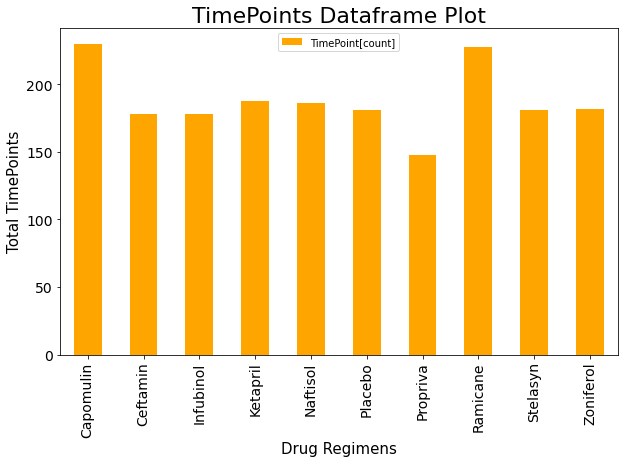

In [9]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
drug_regimen_timepoint_df = pd.DataFrame({
    "TimePoint[count]":drug_regimen_df["Timepoint"].count()
})

df_axis = drug_regimen_timepoint_df.plot(kind='bar', title='TimePoints Dataframe Plot', ylabel='Total Timepoints',
         xlabel='Drug Regimen', figsize=(10, 6), color='orange', fontsize=14)
df_axis.set_title("TimePoints Dataframe Plot", fontsize=22)
df_axis.set_ylabel("Total TimePoints", fontsize=15);
df_axis.set_xlabel("Drug Regimens", fontsize=15);


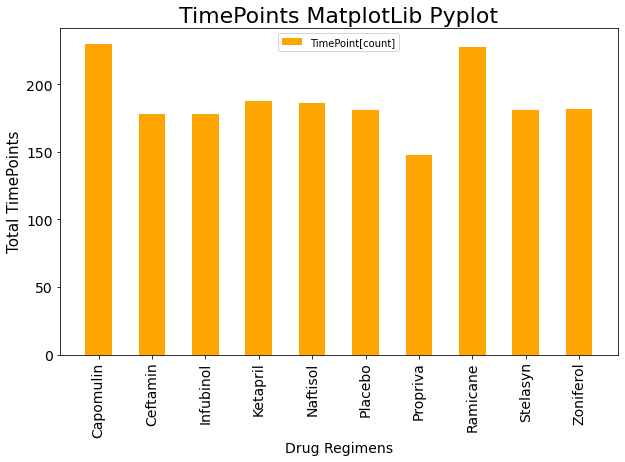

In [10]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
drug_regimen_names = [name for name, temp_df in drug_regimen_df ]
total_timepoints = drug_regimen_df['Timepoint'].count()
chart, axis = mplot.subplots(figsize=(10,6))
axis.bar(drug_regimen_names, total_timepoints, color='orange', label='TimePoint[count]', width=0.5)
axis.set_title("TimePoints MatplotLib Pyplot", fontsize=22)
axis.set_ylabel("Total TimePoints", fontsize=15);
axis.set_xlabel("Drug Regimens", fontsize=14);
axis.legend(loc='upper center')
mplot.xticks(rotation=90, fontsize=14)
mplot.yticks(fontsize=14)
mplot.show()

,Sex,count
0,Female,922
1,Male,958


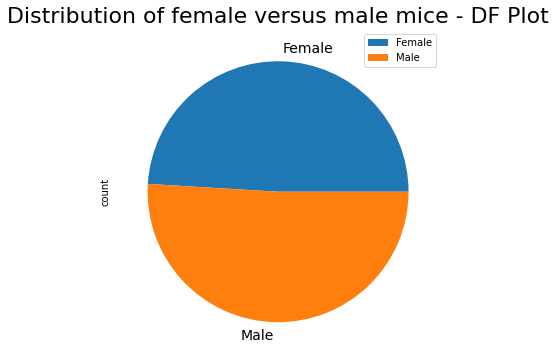

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
mouse_sex_distribution_df = mouse_meta_study_df.groupby(["Sex"])["Mouse ID"].agg(["count"])

axis = mouse_sex_distribution_df.plot.pie(y="count", 
                     figsize=(10, 6), fontsize=14)
axis.set_title("Distribution of female versus male mice - DF Plot", fontsize=22)
mouse_sex_distribution_df.reset_index()


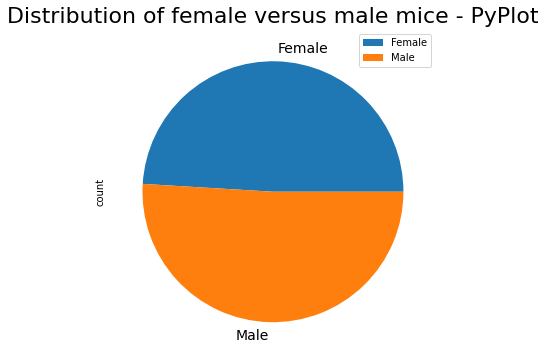

,Sex,count
0,Female,922
1,Male,958


In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

mouse_sex_distribution_df = mouse_meta_study_df.groupby(["Sex"])["Mouse ID"].agg(["count"]).reset_index()
chart, axis = mplot.subplots(figsize=(10,6))
axis.pie(mouse_sex_distribution_df["count"], labels=mouse_sex_distribution_df["Sex"],textprops={'fontsize': 14})
axis.set_title("Distribution of female versus male mice - PyPlot", fontsize=22)
axis.legend(loc='upper right')
axis.set_ylabel("count", fontsize=10);
mplot.show()
mouse_sex_distribution_df

## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
promising_treatment_regimens = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
drug_regimen_mouse_df = mouse_meta_study_df.groupby(['Drug Regimen', 'Mouse ID'], as_index=False)

# Start by getting the last (greatest) timepoint for each mouse
drug_regimen_mouse_max_timepoint = drug_regimen_mouse_df['Timepoint'].max()

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
drug_regimen_mouse_final_tumor_volume_df = pd.merge(drug_regimen_mouse_max_timepoint,mouse_meta_study_df,how='inner',on=['Drug Regimen', 'Mouse ID', 'Timepoint'])

drug_regimen_mouse_final_tumor_volume_df = drug_regimen_mouse_final_tumor_volume_df[[
    'Drug Regimen', 'Mouse ID', 'Timepoint', 'Tumor Volume (mm3)', 'Weight (g)'
]]

drug_regimen_mouse_final_tumor_volume_df = drug_regimen_mouse_final_tumor_volume_df[
    drug_regimen_mouse_final_tumor_volume_df['Drug Regimen'].isin(
    promising_treatment_regimens)
]

drug_regimen_mouse_final_tumor_volume_df

,Drug Regimen,Mouse ID,Timepoint,Tumor Volume (mm3),Weight (g)
0,Capomulin,b128,45,38.98,22
1,Capomulin,b742,45,38.94,21
2,Capomulin,f966,20,30.49,17
3,Capomulin,g288,45,37.07,19
4,Capomulin,g316,45,40.16,22
...,...,...,...,...,...
194,Ramicane,s508,45,30.28,17
195,Ramicane,u196,45,40.67,25
196,Ramicane,w678,5,43.17,24
197,Ramicane,y449,15,44.18,24


In [14]:
# Put treatments into a list for for loop (and later for plot labels)
# Create empty list to fill with tumor vol data (for plotting)
# Calculate the IQR and quantitatively determine if there are any potential outliers. 

# Locate the rows which contain mice on each drug and get the tumor volumes   
# add subset 

tumor_volumes = drug_regimen_mouse_final_tumor_volume_df['Tumor Volume (mm3)']
quartiles = tumor_volumes.quantile([.25,.5,.75])
Q1 = quartiles[0.25]
Q3 = quartiles[0.75]
IQR = Q3 - Q1

print("\n -- Upper Quartile, Lower Quartile & Inter Quartile Range -- \n")
print(f"The lower quartile of Tumor Volume (mm3) is: {Q1}")
print(f"The upper quartile of Tumor Volume (mm3) is: {Q3}")
print(f"The interquartile range of Tumor Volume (mm3) is: {IQR}")
print(f"The the median of Tumor Volume (mm3) is: {quartiles[0.5]} ")
    
# Determine outliers using upper and lower bounds

lower_range = Q1 - (1.5 * IQR)
upper_range = Q3 + (1.5 * IQR)

print("\n -- Outliers -- \n")
print(f"Values below {lower_range} could be outliers.")
print(f"Values above {upper_range} could be outliers.")


 -- Upper Quartile, Lower Quartile & Inter Quartile Range -- 

The lower quartile of Tumor Volume (mm3) is: 37.187743802499995
The upper quartile of Tumor Volume (mm3) is: 59.930261755000004
The interquartile range of Tumor Volume (mm3) is: 22.74251795250001
The the median of Tumor Volume (mm3) is: 45.0 

 -- Outliers -- 

Values below 3.0739668737499812 could be outliers.
Values above 94.04403868375002 could be outliers.


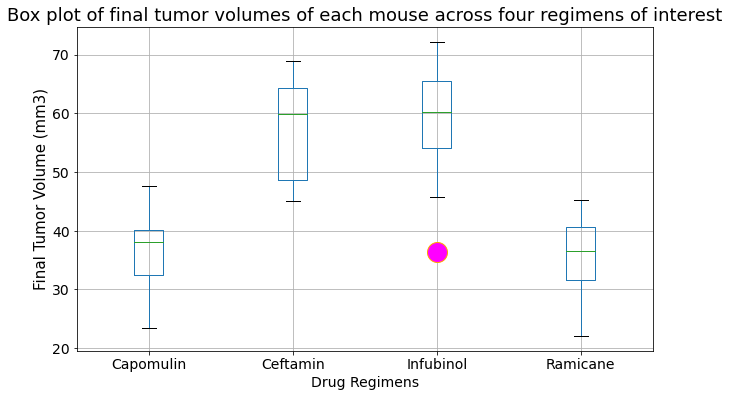

In [15]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
drug_tumor_Volume_df = drug_regimen_mouse_final_tumor_volume_df[['Drug Regimen', 'Tumor Volume (mm3)']]
graph, graph_axes = mplot.subplots(figsize=(10,6))
drug_tumor_Volume_df.boxplot(by='Drug Regimen', widths=0.2, ax=graph_axes,
                            flierprops=dict(markerfacecolor="magenta", markersize="20",
                                           markeredgecolor="orange", linestyle="dotted"))
graph_axes.set_title("Box plot of final tumor volumes of each mouse across four regimens of interest", fontsize=18)
graph_axes.set_ylabel("Final Tumor Volume (mm3)", fontsize=15);
graph_axes.set_xlabel("Drug Regimens", fontsize=14);

graph.suptitle('')
mplot.xticks(fontsize=14)
mplot.yticks(fontsize=14)
mplot.show()

## Line and Scatter Plots

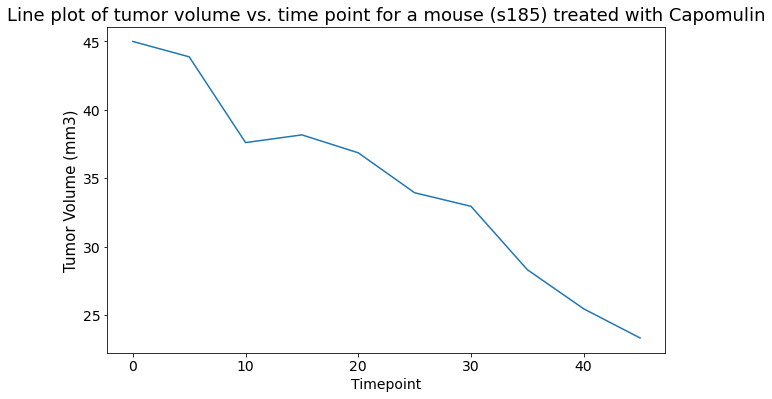

,Mouse ID,Tumor Volume (mm3),Timepoint
228,s185,45.00,0
447,s185,43.88,5
671,s185,37.61,10
714,s185,38.18,15
968,s185,36.87,20
1196,s185,33.95,25
1377,s185,32.96,30
1479,s185,28.33,35
1652,s185,25.47,40
1849,s185,23.34,45


In [16]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
drug_tumor_Volume_df = mouse_meta_study_df[
    (mouse_meta_study_df["Drug Regimen"] == "Capomulin") & 
    (mouse_meta_study_df["Mouse ID"] == 's185')]

graph, graph_axes = mplot.subplots(figsize=(10,6))
Capmoulin_tumor_volume_vs_timepoint_df = drug_tumor_Volume_df[["Tumor Volume (mm3)", "Timepoint"]]

graph_axes.plot(Capmoulin_tumor_volume_vs_timepoint_df["Timepoint"],
                Capmoulin_tumor_volume_vs_timepoint_df["Tumor Volume (mm3)"])

graph_axes.set_title("Line plot of tumor volume vs. time point for a mouse (s185) treated with Capomulin", fontsize=18)
graph_axes.set_ylabel("Tumor Volume (mm3)", fontsize=15);
graph_axes.set_xlabel("Timepoint", fontsize=14);
mplot.xticks(fontsize=14)
mplot.yticks(fontsize=14)
mplot.show()

drug_tumor_Volume_df[["Mouse ID", "Tumor Volume (mm3)", "Timepoint"]]

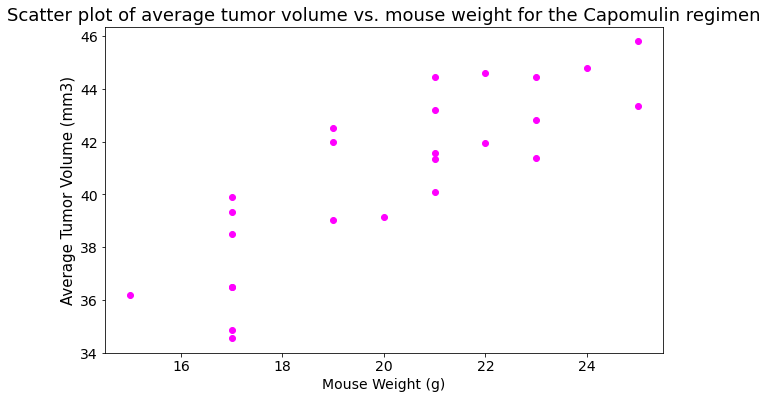

   Drug Regimen Mouse ID  Weight (g)  Avg. Tumor Volume (mm3)
0     Capomulin     s185          17                    34.56
1     Capomulin     x401          15                    36.18
2     Capomulin     m601          17                    34.85
3     Capomulin     f966          17                    36.51
4     Capomulin     u364          17                    39.89
5     Capomulin     y793          17                    38.51
6     Capomulin     r554          17                    36.51
7     Capomulin     m957          19                    39.05
8     Capomulin     t565          17                    39.33
9     Capomulin     i738          20                    39.14
10    Capomulin     w914          21                    41.35
11    Capomulin     g288          19                    41.99
12    Capomulin     l897          19                    42.51
13    Capomulin     b742          21                    40.08
14    Capomulin     b128          22                    41.96
15    Ca

In [17]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
Capmoulin_avg_tumor_volume_vs_mouse_wt_df = mouse_meta_study_df[mouse_meta_study_df['Drug Regimen'] == "Capomulin"].groupby(
    ["Mouse ID"], as_index=False)

Capmoulin_avg_tumor_volume_df = Capmoulin_avg_tumor_volume_vs_mouse_wt_df["Tumor Volume (mm3)"].mean().rename(
columns={"Tumor Volume (mm3)":"Avg. Tumor Volume (mm3)"})

Capmoulin_avg_tumor_volume_vs_mouse_wt_df = pd.merge(
    mouse_meta_data_df[mouse_meta_data_df['Drug Regimen'] == "Capomulin"], Capmoulin_avg_tumor_volume_df, how="inner", on=["Mouse ID"])


Capmoulin_avg_tumor_volume_vs_mouse_wt_df = Capmoulin_avg_tumor_volume_vs_mouse_wt_df[
    ["Drug Regimen", "Mouse ID", "Weight (g)", "Avg. Tumor Volume (mm3)"]]

graph, graph_axes = mplot.subplots(figsize=(10,6))
graph_axes.scatter(Capmoulin_avg_tumor_volume_vs_mouse_wt_df["Weight (g)"], 
                   Capmoulin_avg_tumor_volume_vs_mouse_wt_df["Avg. Tumor Volume (mm3)"], color='magenta')
                                                         
graph_axes.set_title("Scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen", fontsize=18)
graph_axes.set_ylabel("Average Tumor Volume (mm3)", fontsize=15);
graph_axes.set_xlabel("Mouse Weight (g)", fontsize=14);
mplot.xticks(fontsize=14)
mplot.yticks(fontsize=14)
mplot.show()    

print(Capmoulin_avg_tumor_volume_vs_mouse_wt_df)

## Correlation and Regression

In [18]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
correlation_coefficent = Capmoulin_avg_tumor_volume_vs_mouse_wt_df["Weight (g)"].corr(
Capmoulin_avg_tumor_volume_vs_mouse_wt_df["Avg. Tumor Volume (mm3)"])

print(f"{correlation_coefficent} is the correlation coefficient between weight and average tumor volume (mm3) for the Capomulin treatment")

0.841936342469472 is the correlation coefficient between weight and average tumor volume (mm3) for the Capomulin treatment


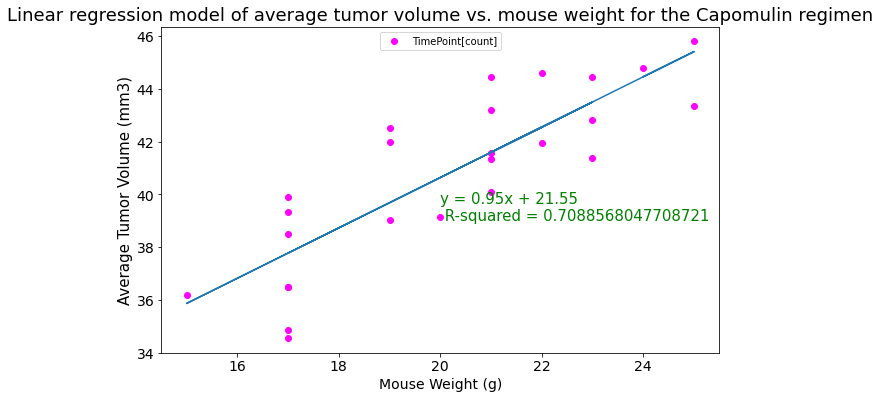

The r-squared is: 0.7088568047708721


In [19]:
mouse_weight = Capmoulin_avg_tumor_volume_vs_mouse_wt_df["Weight (g)"]
mouse_avg_tumor_volume = Capmoulin_avg_tumor_volume_vs_mouse_wt_df["Avg. Tumor Volume (mm3)"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(mouse_weight, mouse_avg_tumor_volume)
regress_values = mouse_weight * slope + intercept
regress_equation = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2)) + "\n R-squared = " + str(rvalue**2)

graph, graph_axes = mplot.subplots(figsize=(10,6))
graph_axes.scatter(Capmoulin_avg_tumor_volume_vs_mouse_wt_df["Weight (g)"], 
                   Capmoulin_avg_tumor_volume_vs_mouse_wt_df["Avg. Tumor Volume (mm3)"], 
                   color='magenta', 
                   label='TimePoint[count]')
graph_axes.plot(mouse_weight, regress_values)
graph_axes.annotate(regress_equation,(20,39), fontsize=15, color="green")

graph_axes.set_title("Linear regression model of average tumor volume vs. mouse weight for the Capomulin regimen", fontsize=18)
graph_axes.set_ylabel("Average Tumor Volume (mm3)", fontsize=15);
graph_axes.set_xlabel("Mouse Weight (g)", fontsize=14);
graph_axes.legend(loc='upper center')
mplot.xticks(fontsize=14)
mplot.yticks(fontsize=14)

mplot.show()
print(f"The r-squared is: {rvalue**2}")